In [1]:
import sklearn as sklean
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgunbd.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [140]:
import datetime as dt
import re
import squarify

In [2]:
cus_df = pd.read_csv("C:/Users/user/OneDrive/Desktop/끙/끙2/프로젝트/5차 최종플젝/Customer_info.csv",sep=',')
cus_df.head(3)
cus_df

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [68]:
dis_df = pd.read_csv("C:/Users/user/OneDrive/Desktop/끙/끙2/프로젝트/5차 최종플젝/Discount_info.csv",sep=',')
dis_df

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [4]:
mar_df = pd.read_csv("C:/Users/user/OneDrive/Desktop/끙/끙2/프로젝트/5차 최종플젝/Marketing_info.csv",sep=',')
mar_df.head(3)
mar_df

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [5]:
on_df = pd.read_csv("C:/Users/user/OneDrive/Desktop/끙/끙2/프로젝트/5차 최종플젝/Onlinesales_info.csv",sep=',')
on_df.head(3)
on_df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [210]:
on_df2['총_구매금액']=on_df2['평균금액']*on_df2['수량']

In [211]:
group_df = on_df2.groupby('거래날짜')['총_구매금액'].sum()

on_group_df = pd.DataFrame(group_df).reset_index()

print(on_group_df)

           거래날짜    총_구매금액
0    2019-01-01   7380.49
1    2019-01-02  13438.47
2    2019-01-03  23834.21
3    2019-01-04  16603.41
4    2019-01-05  17373.19
..          ...       ...
360  2019-12-27  13661.59
361  2019-12-28  10994.42
362  2019-12-29  12011.27
363  2019-12-30   8068.47
364  2019-12-31  10148.32

[365 rows x 2 columns]


In [212]:
# mar_df2['거래날짜']=mar_df2['날짜']
# mar_df2 = mar_df2.drop('날짜', axis=1)


KeyError: '날짜'

In [213]:
mar_on_cor = pd.merge(on_group_df, mar_df2, how='inner', on='거래날짜')
mar_on_cor = mar_on_cor.sort_values(by='거래날짜', ascending=True)
mar_on_cor = mar_on_cor.reset_index(drop=True)
mar_on_cor['마케팅비용']=mar_on_cor['오프라인비용']+mar_on_cor['온라인비용']
mar_on_cor

,거래날짜,총_구매금액,오프라인비용,온라인비용,마케팅비용
0,2019-01-01,7380.49,4500,2424.50,6924.50
1,2019-01-02,13438.47,4500,3480.36,7980.36
2,2019-01-03,23834.21,4500,1576.38,6076.38
3,2019-01-04,16603.41,4500,2928.55,7428.55
4,2019-01-05,17373.19,4500,4055.30,8555.30
...,...,...,...,...,...
360,2019-12-27,13661.59,4000,3396.87,7396.87
361,2019-12-28,10994.42,4000,3246.84,7246.84
362,2019-12-29,12011.27,4000,2546.58,6546.58
363,2019-12-30,8068.47,4000,674.31,4674.31


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


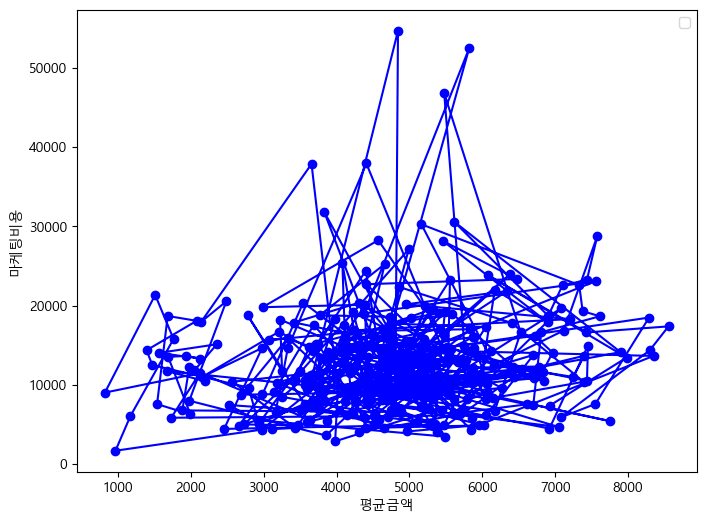

In [215]:
plt.figure(figsize=(8,6))

plt.plot(mar_on_cor['마케팅비용'],mar_on_cor['총_구매금액'],color='blue',linestyle='-',marker='o')

plt.legend()

plt.xlabel('총_구매금액')
plt.ylabel('마케팅비용')

plt.show()

<Axes: xlabel='총_구매금액', ylabel='마케팅비용'>

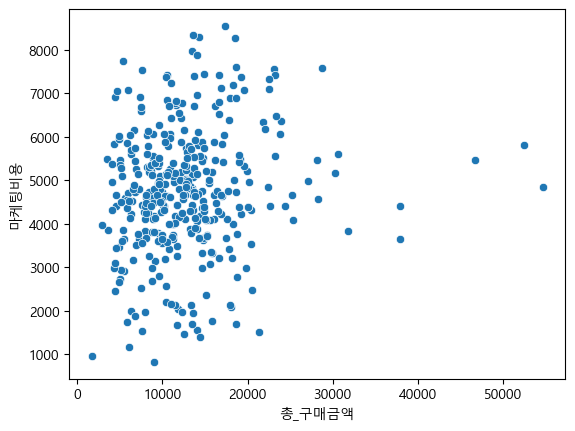

In [216]:
sns.scatterplot(data=mar_on_cor, x= '총_구매금액',y='마케팅비용')

In [6]:
tax_df = pd.read_csv("C:/Users/user/OneDrive/Desktop/끙/끙2/프로젝트/5차 최종플젝/Tax_info.csv",sep=',')
tax_df


,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [7]:
cus_df2=cus_df
on_df2=on_df
tax_df2=tax_df
mar_df2=mar_df
dis_df2=dis_df

In [70]:
sales_df1= pd.merge(on_df2,tax_df2, how='outer',on='제품카테고리')
sales_df1 = sales_df1.sort_values(by=['거래날짜', '고객ID'], ascending=True)
sales_df1 = sales_df1.reset_index(drop=True)
sales_df1.info()
sales_df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
 9   GST     52924 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 4.0+ MB


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST
0,USER_0066,Transaction_0010,2019-01-01,Product_0677,Apparel,1,61.89,6.5,Clicked,0.18
1,USER_0066,Transaction_0012,2019-01-01,Product_0274,Apparel,1,16.50,6.5,Clicked,0.18
2,USER_0066,Transaction_0012,2019-01-01,Product_0284,Apparel,1,14.02,6.5,Clicked,0.18
3,USER_0066,Transaction_0012,2019-01-01,Product_0390,Apparel,1,14.02,6.5,Used,0.18
4,USER_0066,Transaction_0012,2019-01-01,Product_0416,Apparel,1,15.67,6.5,Clicked,0.18
...,...,...,...,...,...,...,...,...,...,...
52919,USER_0845,Transaction_25052,2019-12-31,Product_0490,Apparel,1,3.47,6.5,Used,0.18
52920,USER_0845,Transaction_25052,2019-12-31,Product_0754,Apparel,1,16.30,6.5,Used,0.18
52921,USER_0845,Transaction_25050,2019-12-31,Product_0981,Nest-USA,1,151.88,6.5,Clicked,0.10
52922,USER_0845,Transaction_25051,2019-12-31,Product_0985,Nest-USA,5,80.52,6.5,Clicked,0.10


In [139]:
def pur_day(a):
    match = re.match(r'^2019-(\d{2})', a)
    if match:
        month = int(match.group(1))
        return ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][month - 1]
    else:
        return 'null'

sales_df1['거래월'] = sales_df1['거래날짜'].apply(pur_day)


In [83]:
dis_df2['거래월']=dis_df2['월']

In [93]:
sales_test1 = pd.merge(sales_df1, dis_df2, how='outer', on=['제품카테고리','거래월'])
sales_test1 = sales_test1.sort_values(by=['거래날짜', '고객ID'], ascending=True)
sales_test1 = sales_test1.reset_index(drop=True)
sales_test1 = sales_test1.dropna(subset=['고객ID'])
sales_test1

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,거래월,월,쿠폰코드,할인율
0,USER_0066,Transaction_0010,2019-01-01,Product_0677,Apparel,1.0,61.89,6.5,Clicked,0.18,Jan,Jan,SALE10,10.0
1,USER_0066,Transaction_0012,2019-01-01,Product_0274,Apparel,1.0,16.50,6.5,Clicked,0.18,Jan,Jan,SALE10,10.0
2,USER_0066,Transaction_0012,2019-01-01,Product_0284,Apparel,1.0,14.02,6.5,Clicked,0.18,Jan,Jan,SALE10,10.0
3,USER_0066,Transaction_0012,2019-01-01,Product_0390,Apparel,1.0,14.02,6.5,Used,0.18,Jan,Jan,SALE10,10.0
4,USER_0066,Transaction_0012,2019-01-01,Product_0416,Apparel,1.0,15.67,6.5,Clicked,0.18,Jan,Jan,SALE10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0845,Transaction_25052,2019-12-31,Product_0490,Apparel,1.0,3.47,6.5,Used,0.18,Dec,Dec,SALE30,30.0
52920,USER_0845,Transaction_25052,2019-12-31,Product_0754,Apparel,1.0,16.30,6.5,Used,0.18,Dec,Dec,SALE30,30.0
52921,USER_0845,Transaction_25050,2019-12-31,Product_0981,Nest-USA,1.0,151.88,6.5,Clicked,0.10,Dec,Dec,ELEC30,30.0
52922,USER_0845,Transaction_25051,2019-12-31,Product_0985,Nest-USA,5.0,80.52,6.5,Clicked,0.10,Dec,Dec,ELEC30,30.0


In [102]:
sales_test2 = pd.merge(sales_test1, cus_df2, how='inner', on=['고객ID'])
sales_test2 = sales_test2.sort_values(by=['거래날짜', '고객ID'], ascending=True)
sales_test2 = sales_test2.reset_index(drop=True)
sales_test2 = sales_test2.drop('거래월', axis=1)
sales_test2

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,월,쿠폰코드,할인율,성별,고객지역,가입기간
0,USER_0066,Transaction_0010,2019-01-01,Product_0677,Apparel,1.0,61.89,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33
1,USER_0066,Transaction_0012,2019-01-01,Product_0274,Apparel,1.0,16.50,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33
2,USER_0066,Transaction_0012,2019-01-01,Product_0284,Apparel,1.0,14.02,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33
3,USER_0066,Transaction_0012,2019-01-01,Product_0390,Apparel,1.0,14.02,6.5,Used,0.18,Jan,SALE10,10.0,남,Chicago,33
4,USER_0066,Transaction_0012,2019-01-01,Product_0416,Apparel,1.0,15.67,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0845,Transaction_25052,2019-12-31,Product_0490,Apparel,1.0,3.47,6.5,Used,0.18,Dec,SALE30,30.0,남,New Jersey,19
52920,USER_0845,Transaction_25052,2019-12-31,Product_0754,Apparel,1.0,16.30,6.5,Used,0.18,Dec,SALE30,30.0,남,New Jersey,19
52921,USER_0845,Transaction_25050,2019-12-31,Product_0981,Nest-USA,1.0,151.88,6.5,Clicked,0.10,Dec,ELEC30,30.0,남,New Jersey,19
52922,USER_0845,Transaction_25051,2019-12-31,Product_0985,Nest-USA,5.0,80.52,6.5,Clicked,0.10,Dec,ELEC30,30.0,남,New Jersey,19


In [105]:
def cou_state(a, b):
    if a == 'Used':
        return b
    else:
        return None

sales_test2['쿠폰_수정'] = sales_test2.apply(lambda x: cou_state(x['쿠폰상태'], x['할인율']), axis=1)
sales_test2

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,월,쿠폰코드,할인율,성별,고객지역,가입기간,쿠폰_수정
0,USER_0066,Transaction_0010,2019-01-01,Product_0677,Apparel,1.0,61.89,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,NaN
1,USER_0066,Transaction_0012,2019-01-01,Product_0274,Apparel,1.0,16.50,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,NaN
2,USER_0066,Transaction_0012,2019-01-01,Product_0284,Apparel,1.0,14.02,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,NaN
3,USER_0066,Transaction_0012,2019-01-01,Product_0390,Apparel,1.0,14.02,6.5,Used,0.18,Jan,SALE10,10.0,남,Chicago,33,10.0
4,USER_0066,Transaction_0012,2019-01-01,Product_0416,Apparel,1.0,15.67,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0845,Transaction_25052,2019-12-31,Product_0490,Apparel,1.0,3.47,6.5,Used,0.18,Dec,SALE30,30.0,남,New Jersey,19,30.0
52920,USER_0845,Transaction_25052,2019-12-31,Product_0754,Apparel,1.0,16.30,6.5,Used,0.18,Dec,SALE30,30.0,남,New Jersey,19,30.0
52921,USER_0845,Transaction_25050,2019-12-31,Product_0981,Nest-USA,1.0,151.88,6.5,Clicked,0.10,Dec,ELEC30,30.0,남,New Jersey,19,NaN
52922,USER_0845,Transaction_25051,2019-12-31,Product_0985,Nest-USA,5.0,80.52,6.5,Clicked,0.10,Dec,ELEC30,30.0,남,New Jersey,19,NaN


In [129]:
sales_test2['총_구매금액']=sales_test2['평균금액']*sales_test2['수량']

In [130]:
sales_test2

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,월,쿠폰코드,할인율,성별,고객지역,가입기간,쿠폰_수정,총_구매금액
0,USER_0066,Transaction_0010,2019-01-01,Product_0677,Apparel,1.0,61.89,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,NaN,61.89
1,USER_0066,Transaction_0012,2019-01-01,Product_0274,Apparel,1.0,16.50,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,NaN,16.50
2,USER_0066,Transaction_0012,2019-01-01,Product_0284,Apparel,1.0,14.02,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,NaN,14.02
3,USER_0066,Transaction_0012,2019-01-01,Product_0390,Apparel,1.0,14.02,6.5,Used,0.18,Jan,SALE10,10.0,남,Chicago,33,10.0,14.02
4,USER_0066,Transaction_0012,2019-01-01,Product_0416,Apparel,1.0,15.67,6.5,Clicked,0.18,Jan,SALE10,10.0,남,Chicago,33,NaN,15.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0845,Transaction_25052,2019-12-31,Product_0490,Apparel,1.0,3.47,6.5,Used,0.18,Dec,SALE30,30.0,남,New Jersey,19,30.0,3.47
52920,USER_0845,Transaction_25052,2019-12-31,Product_0754,Apparel,1.0,16.30,6.5,Used,0.18,Dec,SALE30,30.0,남,New Jersey,19,30.0,16.30
52921,USER_0845,Transaction_25050,2019-12-31,Product_0981,Nest-USA,1.0,151.88,6.5,Clicked,0.10,Dec,ELEC30,30.0,남,New Jersey,19,NaN,151.88
52922,USER_0845,Transaction_25051,2019-12-31,Product_0985,Nest-USA,5.0,80.52,6.5,Clicked,0.10,Dec,ELEC30,30.0,남,New Jersey,19,NaN,402.60


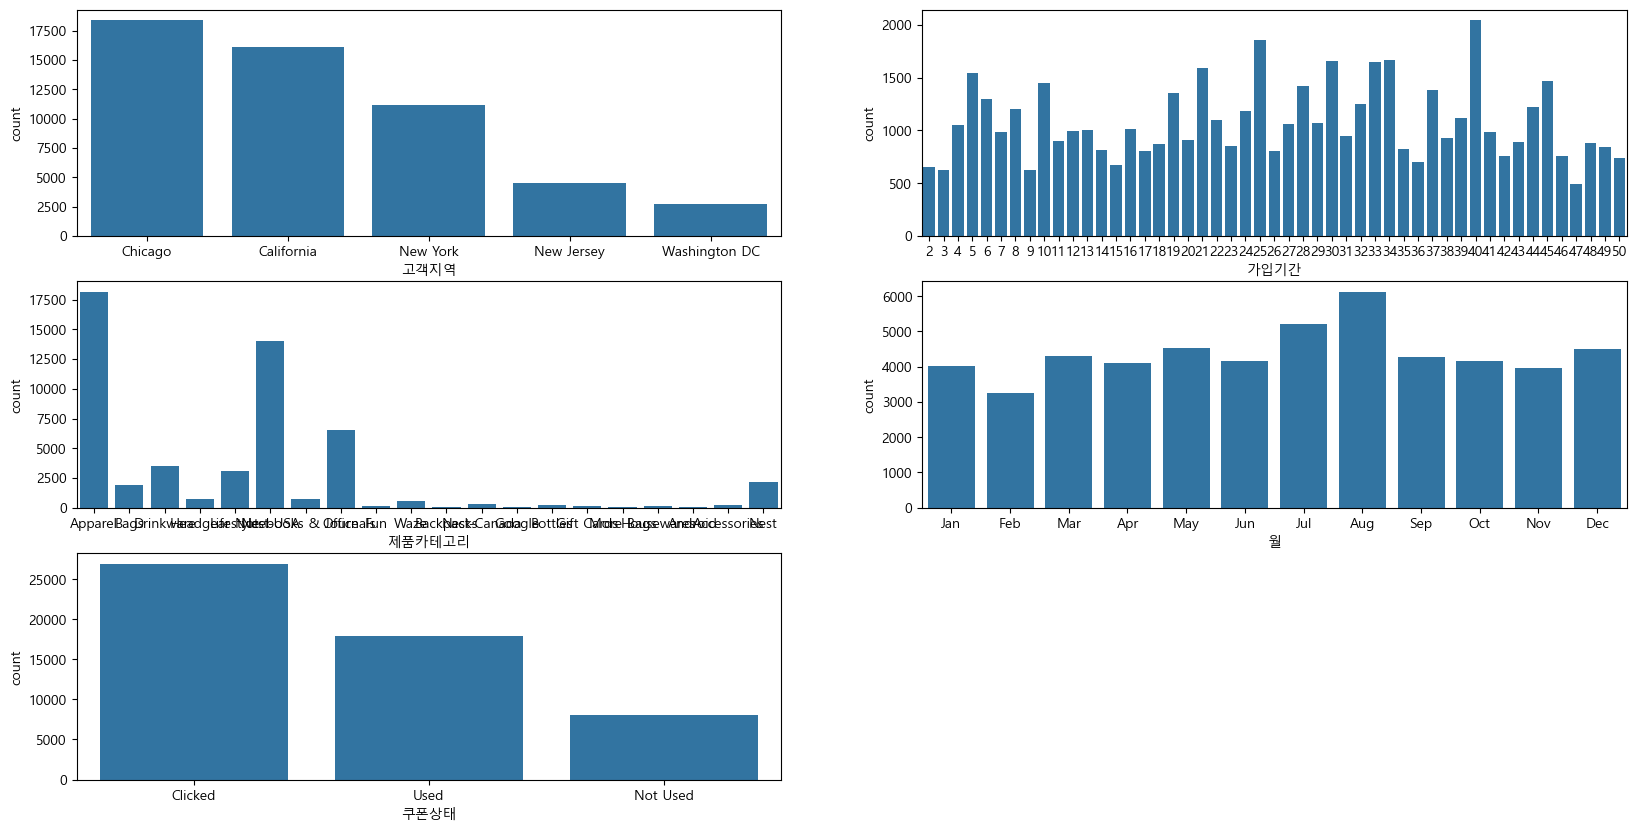

제품카테고리
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                  46
Android                    43
Name: count, dtype: int64

In [123]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 2, 1)
sns.countplot(data=sales_test2, x='고객지역')
plt.subplot(3, 2, 2)
sns.countplot(data=sales_test2, x='가입기간')
plt.subplot(3, 2, 3)
sns.countplot(data=sales_test2, x='제품카테고리')
plt.subplot(3, 2, 4)
sns.countplot(data=sales_test2, x='월')
plt.subplot(3, 2, 5)
sns.countplot(data=sales_test2, x='쿠폰상태')

plt.show()
sales_test2['제품카테고리'].value_counts()


In [144]:
#sales_test3=sales_test2

In [145]:
sales_test3['거래날짜'] = pd.to_datetime(sales_test2['거래날짜'])

today_date = dt.datetime(2020,1,1)

rfm = sales_test3.groupby('고객ID').agg({'거래날짜': lambda x: (today_date - x.max()).days,
                                    '거래ID': lambda x: x.nunique(),
                                    '총_구매금액': lambda x: x.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']
rfm.loc[rfm['monetary'] <= 0, 'monetary'] = 0
rfm = rfm.reset_index()

print(rfm)

           고객ID  recency  frequency  monetary
0     USER_0000      108          1     30.99
1     USER_0001       60         31  13834.90
2     USER_0002       74          8   1442.12
3     USER_0003       18         11   1360.07
4     USER_0004      108         13   1442.47
...         ...      ...        ...       ...
1463  USER_1463      271          3    544.34
1464  USER_1464       88         19   2363.05
1465  USER_1465      195          2    101.56
1466  USER_1466       70          1    298.00
1467  USER_1467       83         53   6362.77

[1468 rows x 4 columns]


In [172]:
def get_rfm_scores(dataframe) -> pd.core.frame.DataFrame:

    sales_test3 = dataframe.copy()
    sales_test3["recency_score"] = pd.qcut(sales_test3["recency"], 5, labels=[5, 4, 3, 2, 1])
    sales_test3["frequency_score"] = pd.qcut(
        sales_test3["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]
    )
    sales_test3["monetary_score"] = pd.qcut(sales_test3["monetary"], 5, labels=[1, 2, 3, 4, 5])
    sales_test3["RFM_SCORE"] = sales_test3["recency_score"].astype(str) + sales_test3["frequency_score"].astype(
        str
    )

    return sales_test3

rfm = get_rfm_scores(rfm)

In [231]:
rfm['mean']=rfm['monetary']/rfm['frequency']
rfm

,고객ID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,mean,segment
0,USER_0000,108,1,30.99,3,1,1,31,30.990000,이탈 가능성
1,USER_0001,60,31,13834.90,4,5,5,45,446.287097,충성 고객
2,USER_0002,74,8,1442.12,4,2,3,42,180.265000,충성 잠재
3,USER_0003,18,11,1360.07,5,3,3,53,123.642727,충성 잠재
4,USER_0004,108,13,1442.47,3,3,3,33,110.959231,주의 필요
...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,271,3,544.34,1,1,2,11,181.446667,이탈
1464,USER_1464,88,19,2363.05,4,4,3,44,124.371053,충성 고객
1465,USER_1465,195,2,101.56,2,1,1,21,50.780000,이탈
1466,USER_1466,70,1,298.00,4,1,1,41,298.000000,유망 고객


In [227]:
seg_map = {
    r'[1-2][1-2]': '이탈',
    r'[1-2][3-4]': '이탈 위험',
    r'[1-2]5': '공략 필요',
    r'3[1-2]': '이탈 가능성',
    r'33': '주의 필요',
    r'[3-4][4-5]': '충성 고객',
    r'41': '유망 고객',
    r'51': '신규 고객',
    r'[4-5][2-3]': '충성 잠재',
    r'5[4-5]': 'VIP'
}


In [230]:
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
heatmap_data = rfm.pivot_table(index='RFM_SCORE', columns='segment', aggfunc='size', fill_value=0)


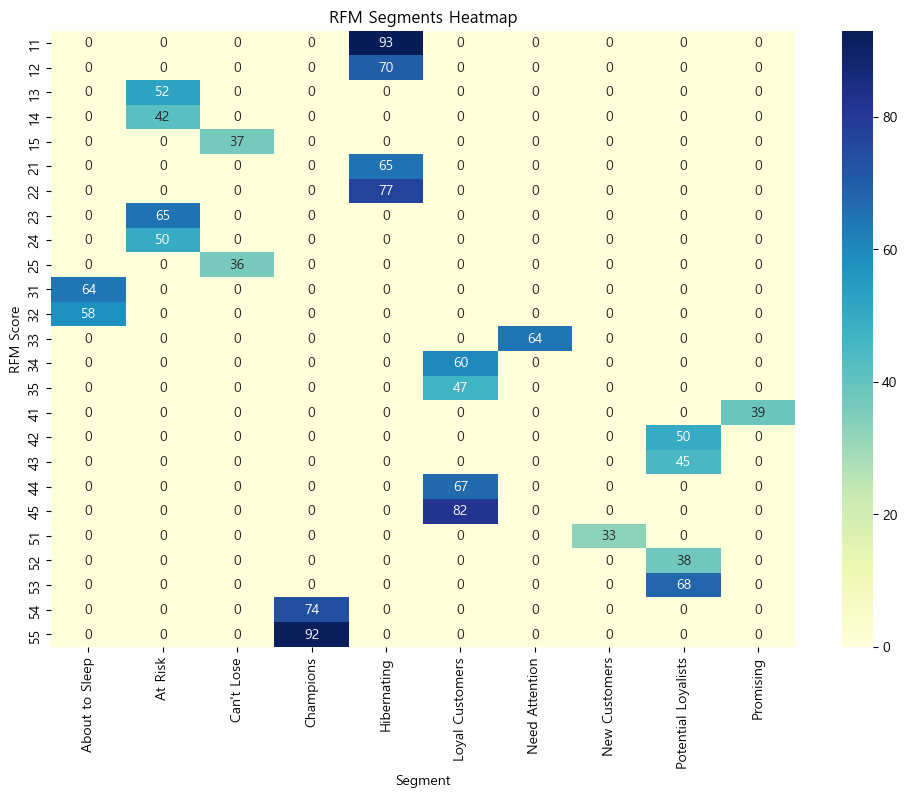

In [194]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
# plt.title('RFM Segments Heatmap')
# plt.xlabel('Segment')
# plt.ylabel('RFM Score')
# plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='frequency'>

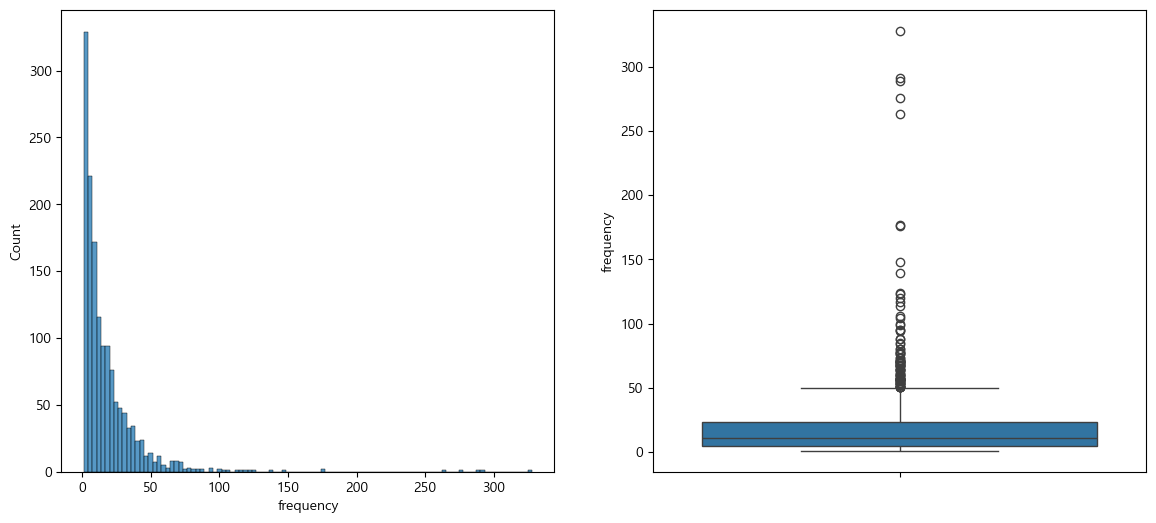

In [185]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))
sns.histplot(data=rfm, x='frequency', ax=ax[0],legend=False)
sns.boxplot(data=rfm, y='frequency', ax=ax[1],legend=False)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='recency'>

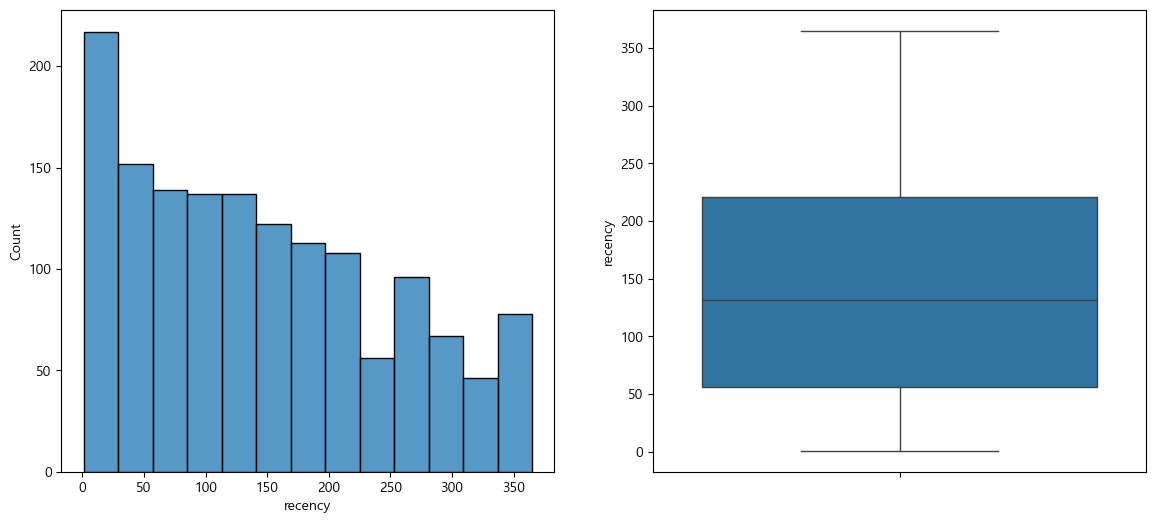

In [197]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))
sns.histplot(data=rfm, x='recency', ax=ax[0],legend=False)
sns.boxplot(data=rfm, y='recency', ax=ax[1],legend=False)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='monetary'>

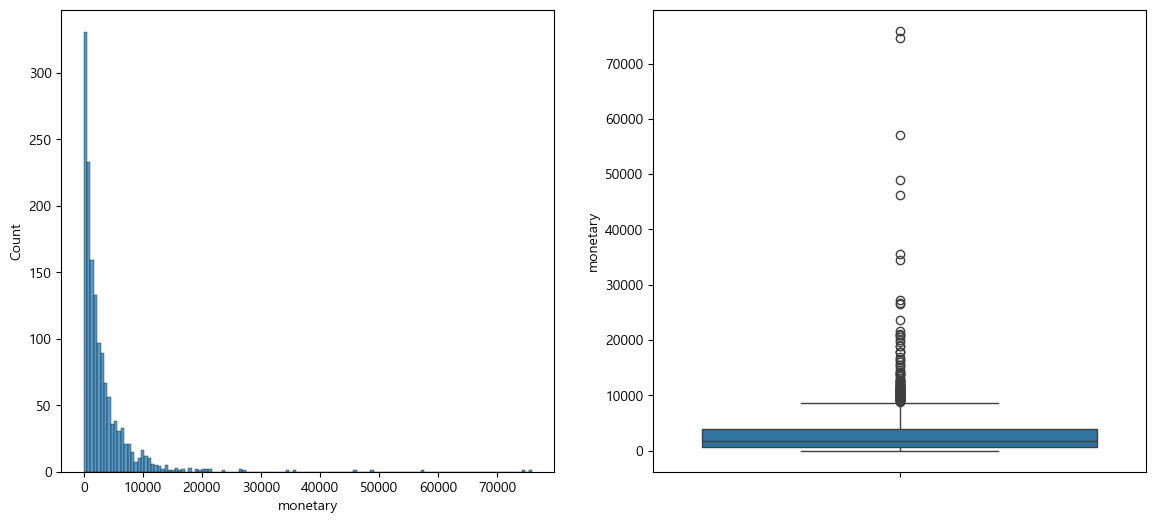

In [199]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))
sns.histplot(data=rfm, x='monetary', ax=ax[0],legend=False)
sns.boxplot(data=rfm, y='monetary', ax=ax[1],legend=False)

In [ ]:
sales_df1= pd.merge(on_df2,tax_df2, how='outer',on='제품카테고리')
sales_df1 = sales_df1.sort_values(by=['거래날짜', '고객ID'], ascending=True)
sales_df1 = sales_df1.reset_index(drop=True)
sales_df1.info()
sales_df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
 9   GST     52924 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 4.0+ MB


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST
0,USER_0066,Transaction_0010,2019-01-01,Product_0677,Apparel,1,61.89,6.5,Clicked,0.18
1,USER_0066,Transaction_0012,2019-01-01,Product_0274,Apparel,1,16.50,6.5,Clicked,0.18
2,USER_0066,Transaction_0012,2019-01-01,Product_0284,Apparel,1,14.02,6.5,Clicked,0.18
3,USER_0066,Transaction_0012,2019-01-01,Product_0390,Apparel,1,14.02,6.5,Used,0.18
4,USER_0066,Transaction_0012,2019-01-01,Product_0416,Apparel,1,15.67,6.5,Clicked,0.18
...,...,...,...,...,...,...,...,...,...,...
52919,USER_0845,Transaction_25052,2019-12-31,Product_0490,Apparel,1,3.47,6.5,Used,0.18
52920,USER_0845,Transaction_25052,2019-12-31,Product_0754,Apparel,1,16.30,6.5,Used,0.18
52921,USER_0845,Transaction_25050,2019-12-31,Product_0981,Nest-USA,1,151.88,6.5,Clicked,0.10
52922,USER_0845,Transaction_25051,2019-12-31,Product_0985,Nest-USA,5,80.52,6.5,Clicked,0.10


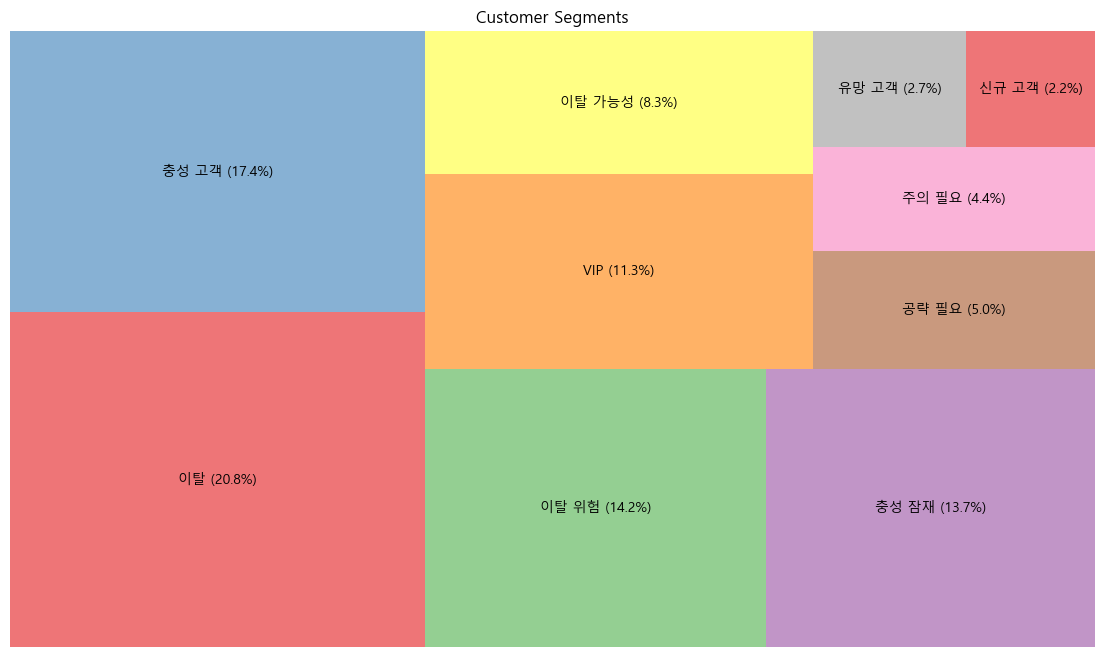

In [232]:
sizes = rfm['segment'].value_counts()

percentages = sizes / sizes.sum() * 100

labels = [f'{segment} ({percentage:.1f}%)' for segment, percentage in zip(sizes.index, percentages)]

plt.figure(figsize=(14, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.6, color=sns.color_palette('Set1', len(sizes)))
plt.title('Customer Segments')
plt.axis('off')
plt.show()